# Pima Indians Diabetes Dataset 

In [165]:
# imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [67]:
# loading dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All of the data are numerical non-nulls. Missing values could be 0's.

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0's makes sense in the Pregnencies column but they probably means missing data in others.

In [93]:
# % of each class in 'Outcome'

(df['Outcome'].value_counts() / len(df) * 100).round(2)

0    65.1
1    34.9
Name: Outcome, dtype: float64

## Missing values

In [73]:
# 0's in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' columns

missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in missing:
    print(column, (df[column] == 0).sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [75]:
# replace all 'missing value' 0's to NaN

for column in missing:
    df[column].replace(0, np.nan, inplace=True)

df[missing].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [88]:
# % of missing values in these columns

(df[missing].isnull().sum() / len(df) * 100).round(2)

Glucose           0.65
BloodPressure     4.56
SkinThickness    29.56
Insulin          48.70
BMI               1.43
dtype: float64

In [132]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


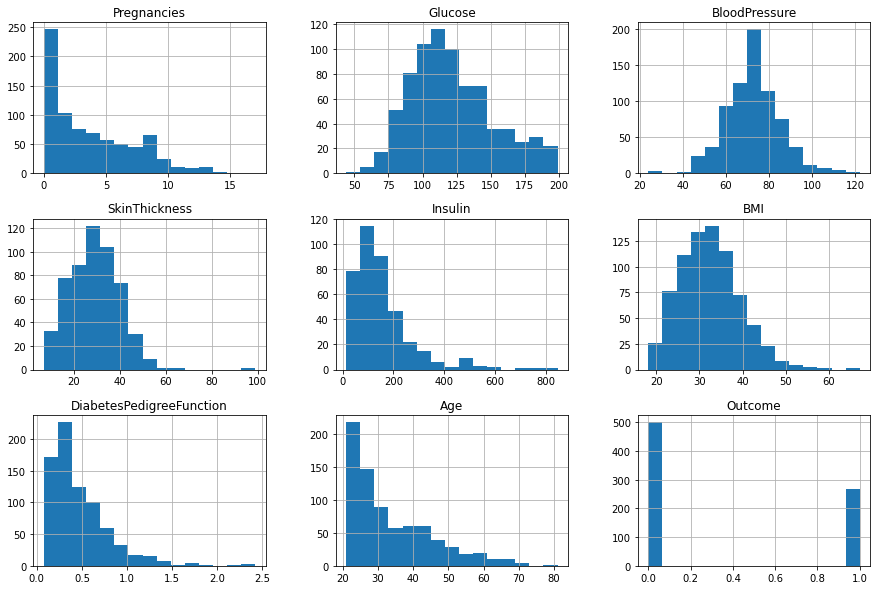

In [87]:
# distributions of values in each column after removing missing values 0s

df.hist(bins=15,figsize=(15, 10));

## Outliers

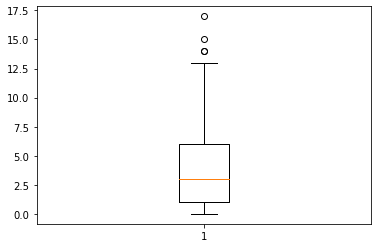

In [131]:
# Checking for outliers in 'Pregnencies'

plt.boxplot(df.Pregnancies)
plt.show()

In [114]:
# checking if outliers in 'Pregnancies' make sense with the corresponding ages

df[df['Pregnancies'] > 12][['Pregnancies', 'Age']]

,Pregnancies,Age
28,13,57
72,13,42
86,13,45
88,15,43
159,17,47
274,13,52
298,14,46
323,13,43
357,13,44
455,14,38


All appear to be plausible.

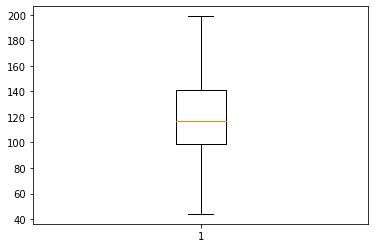

In [139]:
#Checking for outliers in 'Glucose'

plt.boxplot(df['Glucose'][~df['Glucose'].isnull()])
plt.show()

No outliers in 'Glucose'

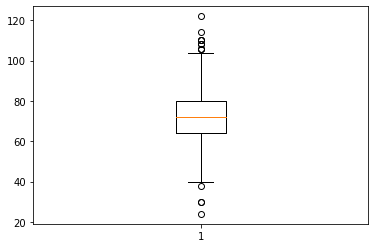

In [140]:
# Checking for outliers in 'BloodPressure'

plt.boxplot(df['BloodPressure'][~df['BloodPressure'].isnull()])
plt.show()

Outliers in the 'BloodPressure' column are likely individuals that are hyper- and hypotensive. 

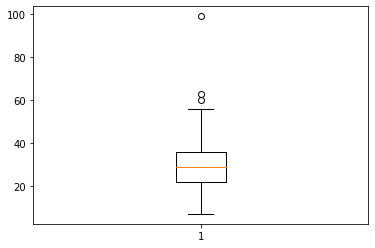

In [143]:
# Checking for outliers in 'SkinThickness'

plt.boxplot(df['SkinThickness'][~df['SkinThickness'].isnull()])
plt.show()

There is 1 extremely high value at 99, but no reason to believe it's a mistake.

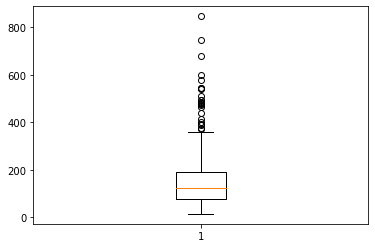

In [147]:
# checking for outliers in 'Insulin'

plt.boxplot(df['Insulin'][~df['Insulin'].isnull()])
plt.show()

In [164]:
df[df['Insulin'] > 500]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
286,5,155.0,84.0,44.0,545.0,38.7,0.619,34,0
409,1,172.0,68.0,49.0,579.0,42.4,0.702,28,1
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


The distribution of insulin level is highly skewed to the right. Insulin level is known to be associated with glucose level and type 2 diabetes.

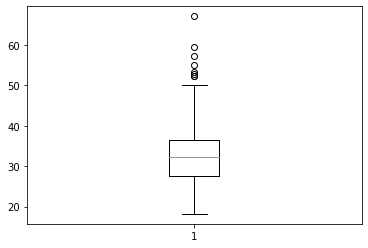

In [154]:
# Checking for outliers in 'BMI'

plt.boxplot(df['BMI'][~df['BMI'].isnull()])
plt.show()

In [158]:
df[df['BMI'] > 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
303,5,115.0,98.0,NaN,NaN,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0


There are obese individuls with very high BMI. Obesity is assoiciated with type 2 diabetes.

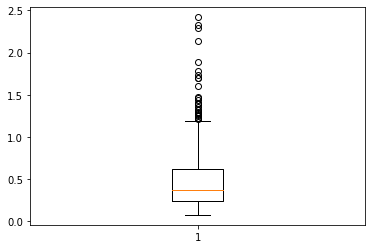

In [159]:
# Checking for outliers in 'DiabetesPedegreeFunction'

plt.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

Diabetes Pedigree Function is a calculated metric that measures the risk of diabetes based on family history. Its distribution is skewed to the right with quite a few data points outside of the upper whisker. 

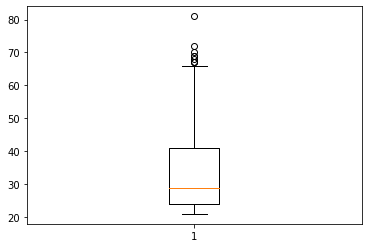

In [160]:
plt.boxplot(df['Age'])
plt.show()

Majority of the individuls are between 20 to 40 years of age with a few much older individuls in their 70s and 1 past 80 years old. 